Challenge Questions:

Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [1]:
# import some packages and libraries:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Grab and read the raw dataset:
data_path = (r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\sentiment labelled sentences\sentiment labelled sentences\amazon_cells_labelled.txt')
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns=['message', 'sentiment']
data_raw.head()

<bound method NDFrame.head of                                                message  sentiment
0    So there is no way for me to plug it in here i...          0
1                          Good case, Excellent value.          1
2                               Great for the jawbone.          1
3    Tied to charger for conversations lasting more...          0
4                                    The mic is great.          1
5    I have to jiggle the plug to get it to line up...          0
6    If you have several dozen or several hundred c...          0
7          If you are Razr owner...you must have this!          1
8                  Needless to say, I wasted my money.          0
9                     What a waste of money and time!.          0
10                     And the sound quality is great.          1
11   He was very impressed when going from the orig...          1
12   If the two were seperated by a mere 5+ ft I st...          0
13                            Very good qualit

For first step of feature engineering, Transforming the existing variables and making variables easier to understand. So, changing sentiment column to boolean to better understanding.

In [3]:
# Change to boolean, so we can easily do some statistics to prepare for modeling:
data_raw['sentiment']= (data_raw['sentiment']==1)

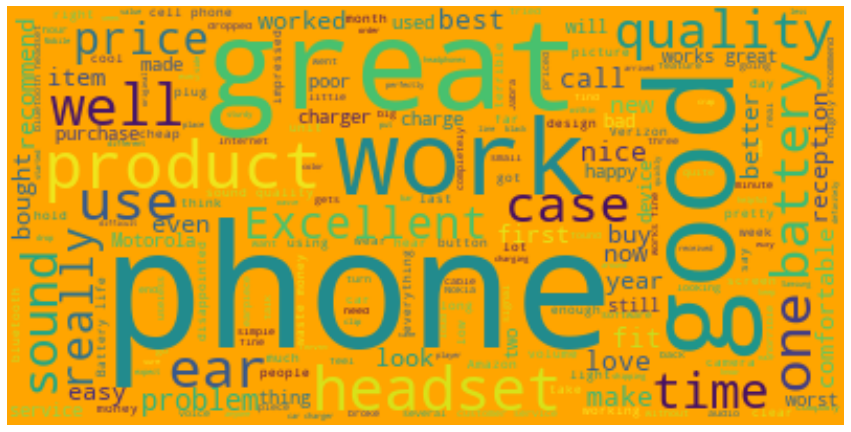

In [4]:
# Generate a word cloud image to findout most frequenty words.
wordcloud = WordCloud(background_color="orange").generate(" ".join(data_raw["message"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

For second step of feature engineering, Creating new variables because we believe will be useful in explaining our target.

In [5]:
# Messages are not feature, so we  can use feature engineer to make list of positive sentiment word as a feature and then make column of each word and see how many of columns are contains the words.
words = ['good', 'fantastic', 'excellent', 'great', 'well', 'best', 'fine', 'wonderful', 'satisfied', 'nice', 'love', 'impressed', 'comfortable', 'happy', 'pretty', 'amazing', 'friendly']

for word in words:
    data_raw[str(word)] = data_raw.message.str.contains(' ' + str(word) + ' ',case=False)
    

For the third step of feature engineering, Selecting the features, using correlation and heatmap plot to find out they have not strong relation and they are independent.

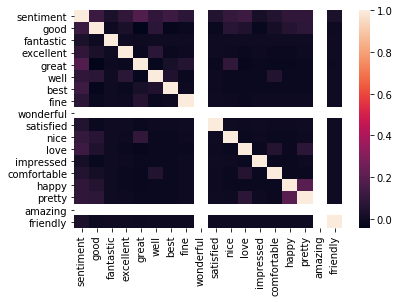

In [6]:
# Checking for variable's independently because one of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other.
sns.heatmap(data_raw.corr())

In [7]:
# choosing independent columns and sentiment column to data and target variable:
data = data_raw[words]
target = data_raw['sentiment']

I use Bernoulli Naive Bayes classification, because the Naive Bayes is particularly good for text classification and outcome is binary.

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 367


 Test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [9]:
# Grab and read another raw dataset:
data_path = (r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\sentiment labelled sentences\sentiment labelled sentences\yelp_labelled.txt')
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns=['message', 'sentiment']

For first step of feature engineering, Transforming the existing variables and making variables easier to understand. So, changing sentiment column to boolean to better understanding.

In [10]:
# Change to boolean, so we can easily do some statistics to prepare for modeling:
data_raw['sentiment']= (data_raw['sentiment']==1)

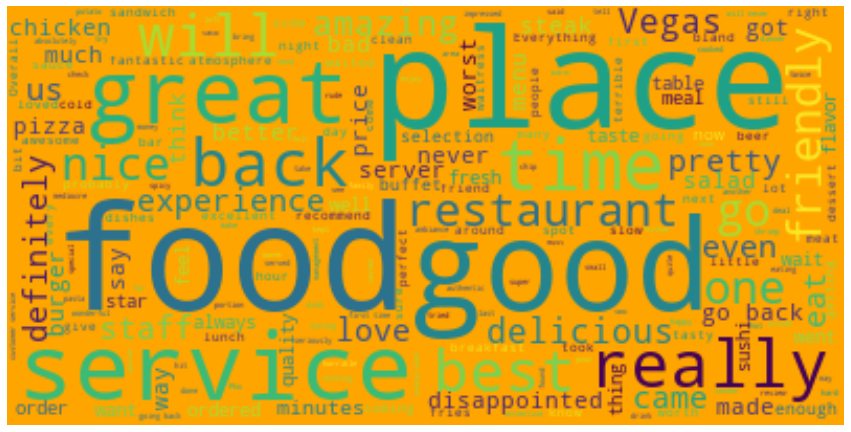

In [11]:
# Generate a word cloud image to findout most frequenty words.
wordcloud = WordCloud(background_color="orange").generate(" ".join(data_raw["message"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

For second step of feature engineering, Creating new variables because we believe will be useful in explaining our target.

In [12]:
# Messages are not feature, so we  can use feature engineer to make list of positive sentiment word as a feature and then make column of each word and see how many of columns are contains the words.
words = ['good', 'fantastic', 'excellent', 'great', 'well', 'best', 'fine', 'wonderful', 'delicious', 'tasty', 'satisfied', 'nice', 'love', 'impressed', 'comfortable', 'happy', 'pretty', 'amazing', 'friendly']

for word in words:
    data_raw[str(word)] = data_raw.message.str.contains(' ' + str(word) + ' ',case=False)
    

For the third step of feature engineering, Selecting the features, using correlation and heatmap plot to find out they have not strong relation and they are independent.

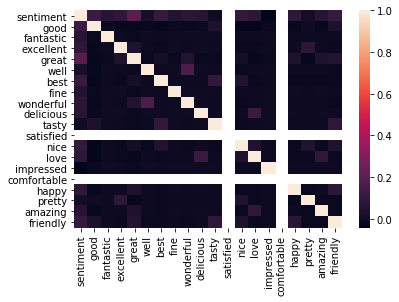

In [13]:
# Checking for variable's independently because one of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other.
sns.heatmap(data_raw.corr())

In [14]:
# choosing independent columns and sentiment column to data and target variable:
data = data_raw[words]
target = data_raw['sentiment']

I use Bernoulli Naive Bayes classification, because the Naive Bayes is particularly good for text classification and outcome is binary.

In [15]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 360


Both dataset almost have the same mislabeled, but the Yelp dataset a little bit less.